# There is no plan bee without them 🐝

## Abstract

Pollinators around the world play a central role in our agriculture with an estimated economic benefit of €235bn per year. Up to 75% of our crops are dependent on pollination and honeybees account for most of it. Yet, in Europe and the USA the bee population has been declining at an alarming rate during the last decades. As by-hand pollination is not an alternative, it is impossible to imagine a world without them. [1]

With this project, we first aim at giving insights about the state of bee health and honey produced and traded using the [FAO datasets](http://www.fao.org/faostat/en/#data). Secondly, we focus on the USA using results from [US Departement of Agriculture](https://quickstats.nass.usda.gov/) in order to identify and present the main factors of bee decline. Finally, we propose a case study about almonds in California to show the consequences of a lack of bees.

[[1](http://sos-bees.org/wp-content/uploads/2014/04/BeesInDecline.pdf)] *Bees in Decline*, Greenpeace, 2013

## Disclaimer

There are a lot of different pollinator species in danger; however, we will only focus on commercial honey bees. All the data gathered about them obviously excludes wild populations since we deal with agricultural data. We found no surveys about wild populations.

In [1]:
# Python imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

matplotlib.rc('font', **{'size': 12}) # Text more readable

## 1. How do the continents compare in terms of bee decline from 1961 to these days?

Our first goal is to plot the evolution of the number of beehives per continent. For this purpose, we use the dataset from FAOSTAT listing the number of beehives per country from 1961.

In [2]:
beehives_raw = pd.read_csv('data/FAOSTAT_Live_Stock.csv')
beehives_raw.head()

Domain Code        Domain  Area Code     Area  Element Code Element  \
0          QA  Live Animals          3  Albania          5114  Stocks   
1          QA  Live Animals          3  Albania          5114  Stocks   
2          QA  Live Animals          3  Albania          5114  Stocks   
3          QA  Live Animals          3  Albania          5114  Stocks   
4          QA  Live Animals          3  Albania          5114  Stocks   

   Item Code      Item  Year Code  Year Unit     Value Flag Flag Description  
0       1181  Beehives       1961  1961   No   95100.0  NaN    Official data  
1       1181  Beehives       1962  1962   No   92800.0  NaN    Official data  
2       1181  Beehives       1963  1963   No   83500.0  NaN    Official data  
3       1181  Beehives       1964  1964   No   96500.0  NaN    Official data  
4       1181  Beehives       1965  1965   No  109800.0  NaN    Official data

Let's only select the columns that interest us, i.e. everything apart from the country, the year and the number of beehives.

In [3]:
beehives_raw = beehives_raw[['Area', 'Year', 'Value']]
beehives_raw.head()

Area  Year     Value
0  Albania  1961   95100.0
1  Albania  1962   92800.0
2  Albania  1963   83500.0
3  Albania  1964   96500.0
4  Albania  1965  109800.0

Then, let's import a small dataset that lists all the countries in the world to their respective continents. The csv file was [found here](https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv) and saved in the folder `data` as `countries.csv`.

In [4]:
countries = pd.read_csv('data/countries.csv')
# We only want the name of the country and its continent
countries = countries[['name', 'region']].set_index('name')
print('Are the countries in the dataset unique? -> %s' % countries.index.is_unique)
countries.head()

Are the countries in the dataset unique? -> True


region
name                   
Afghanistan        Asia
Åland Islands    Europe
Albania          Europe
Algeria          Africa
American Samoa  Oceania

The `countries` dataset does not have data from certain countries present in the FAOSTAT dataset. These countries have either ceased to exist (USSR, Yugoslavia, ...), or were defined differently (China, mainland, ...). Let's add them manually.

In [5]:
countries.loc['Belgium-Luxembourg'] = 'Europe'
countries.loc['China, mainland'] = 'Asia'
countries.loc['China, Taiwan Province of'] = 'Asia'
countries.loc['Czechoslovakia'] = 'Europe'
countries.loc['Ethiopia PDR'] = 'Africa'
countries.loc['Palestine'] = 'Asia'
countries.loc['Republic of Korea'] = 'Asia'
countries.loc['Republic of Moldova'] = 'Europe'
countries.loc['Serbia and Montenegro'] = 'Europe'
countries.loc['Sudan (former)'] = 'Africa'
countries.loc['United Kingdom'] = 'Europe'
countries.loc['United Republic of Tanzania'] = 'Africa'
countries.loc['USSR'] = 'Europe'
countries.loc['Wallis and Futuna Islands'] = 'Oceania'
countries.loc['Yugoslav SFR'] = 'Europe'

countries['region'].value_counts()

Africa      63
Europe      58
Americas    57
Asia        55
Oceania     30
Name: region, dtype: int64

We indeed verify that all 5 continents are present.

Then, we add the continent as a column in our beehive dataset.

In [6]:
beehives_raw['Continent'] = beehives_raw.apply(lambda row: countries.loc[row['Area']], axis=1)
beehives_raw.head()

Area  Year     Value Continent
0  Albania  1961   95100.0    Europe
1  Albania  1962   92800.0    Europe
2  Albania  1963   83500.0    Europe
3  Albania  1964   96500.0    Europe
4  Albania  1965  109800.0    Europe

We can now aggregate the values together for each continent.

In [7]:
beehives = beehives_raw.drop('Area', 1)
beehives = beehives.pivot_table(index=['Year'], columns=['Continent'], aggfunc=np.sum)
beehives.columns.names = ['Number of beehives', 'Continent']
beehives.head()

Number of beehives      Value                                              
Continent              Africa    Americas        Asia      Europe   Oceania
Year                                                                       
1961                6845050.0  10019254.0  14060894.0  21097615.0  506660.0
1962                6986195.0  10038371.0  14361851.0  21182265.0  530345.0
1963                7291050.0   9388825.0  14559696.0  21758651.0  491061.0
1964                7365275.0   9261154.0  14963317.0  21159899.0  533889.0
1965                7822375.0   8221129.0  16588637.0  20966688.0  526280.0

Let's plot the absolute values to see what is exactly going on.

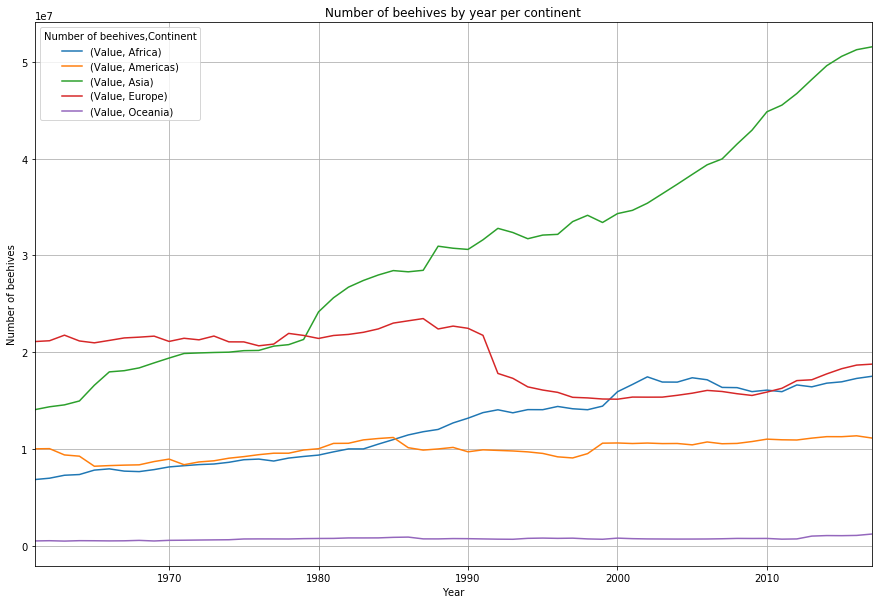

In [8]:
def plot_beehives(df, height=6):
    ax = df.plot(kind='line', figsize=(15,height), grid=True)
    ax.set_ylabel('Number of beehives')
    return ax
    
ax = plot_beehives(beehives, height=10)
ax.set_title('Number of beehives by year per continent');

We can observe the following:

- Asia sees the biggest growth on Earth, surpassing Europe in the 80s, and always growing.
- Europe saw a sharp decline in the beginning of the 90s. It recovers slowly since the 2010s. It still has not reached its former levels of the 80s.
- Afica does not see any real change since the beggining of the 2000s
- Americas seem to not really evolve in numbers since the beginning.
- It's difficult to tell for Oceania, because its production is really low compared to the rest of the world.

Based on this preliminary analysis, we will focus the rest of our analysis on Europe, Asia and Americas.

That's all well and good, but an interesting statistic would be to see the derivate of these values. Let's modify our pivot table.

In [9]:
beehives_derivative = beehives.diff() / beehives
# This obviously creates a NaN value for the first year, let's replace it by 0
beehives_derivative = beehives_derivative.fillna(0)

### Europe

Now, let's compute the values for Europe.

The mean change for the period 1961-2017 is -0.26%.
The standard deviation for the period 1961-2017 is 3.62%


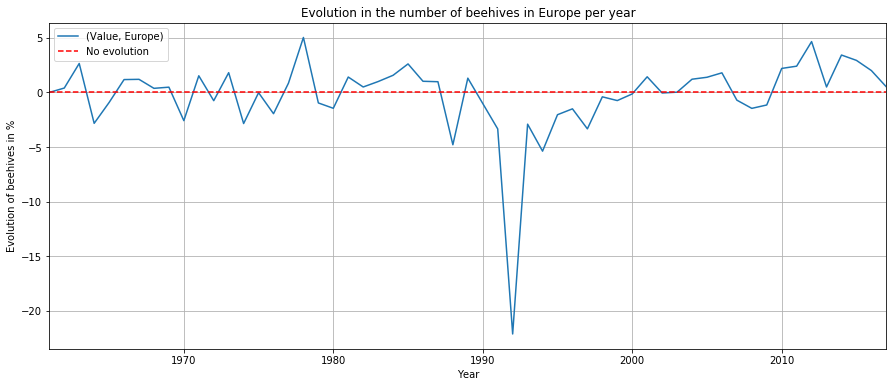

<Figure size 1080x432 with 0 Axes>

In [10]:
beehives_evol_eur = beehives_derivative[('Value','Europe')]
print('The mean change for the period 1961-2017 is %.2f%%.' % (beehives_evol_eur.mean()*100))
print('The standard deviation for the period 1961-2017 is %.2f%%' % (beehives_evol_eur.std()*100))

ax = plot_beehives(beehives_evol_eur*100)
ax.axhline(y=0.0, color='red', linestyle='--', label='No evolution')
ax.set_title('Evolution in the number of beehives in Europe per year')
ax.set_ylabel('Evolution of beehives in %')
plt.legend()
plt.figure(figsize=(15,6));

In [11]:
decrease = abs(beehives_evol_eur.min()*100)
msg = 'Europe saw their worst year in total beehives numbers in %d, where it lost %.1f%% of their count.'
print(msg % (beehives_evol_eur.idxmin(), decrease))

Europe saw their worst year in total beehives numbers in 1992, where it lost 22.1% of their count.


Let's note that the mean gain is negative, meaning that Europe saw more losses on a year-to-year basis than gains. Since the standard deviation is quite big, we can however not conclude anything. However, we have seen that the numbers have overall dropped since the 80s, and never recovered.

We can see a very sharp and significant decline in 1992 (-22.1%). Let's investigate on where it came from, by looking at the individual countries in Europe.

In [12]:
def build_continent(continent):
    continent = beehives_raw[beehives_raw['Continent'] == continent]
    continent = continent.pivot_table(index=['Year'], columns=['Area'], aggfunc=np.sum)
    continent.columns.names = ['Number of beehives', 'Country']
    return continent
    

beehives_eur = build_continent('Europe')

beehives_eur_gains = beehives_eur.diff()
beehives_eur_gains = beehives_eur_gains.fillna(0)

beehives_eur_1992 = beehives_eur_gains.loc[1992]
beehives_eur_1992[beehives_eur_1992 < 0.0].sort_values()

Number of beehives  Country       
Value               Bulgaria         -101191.0
                    Czechoslovakia    -97966.0
                    Germany           -47000.0
                    Albania           -36700.0
                    France            -16478.0
                    Sweden            -13000.0
Name: 1992, dtype: float64

We see that there are 6 countries that lost beehives in 1992. Let's investigate them individually.

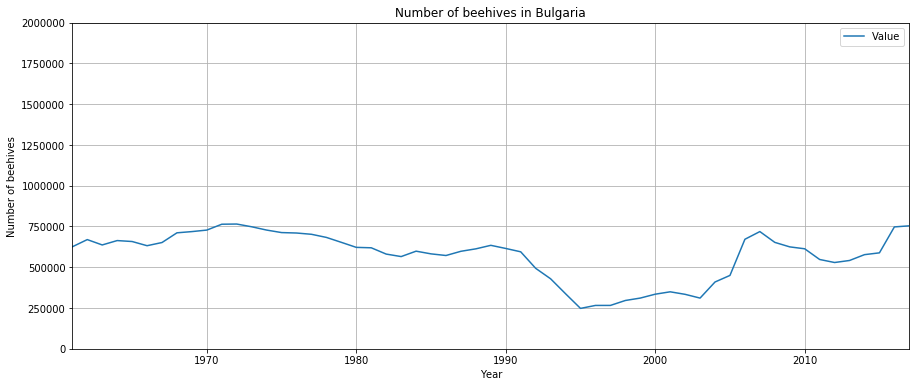

In [13]:
def plot_country(country, top=2e6):
    ax = plot_beehives(beehives_raw[beehives_raw['Area'] == country].set_index('Year'))
    ax.set_title('Number of beehives in %s' % country)
    ax.set_ylim(bottom=0, top=top)
    
plot_country('Bulgaria')

We see that the number of beehives in Bulgaria dropped significantly during the first years of the 90s, and rose again in the mid 00s. It is currently at its highest levels, observed during the 70s. This is certainly due to the fall of the USSR and the Warsaw Pact, which dramatically changed the economic incentives for the Bulgarian population and bee keepers. So this is a legitimate loss for this year.

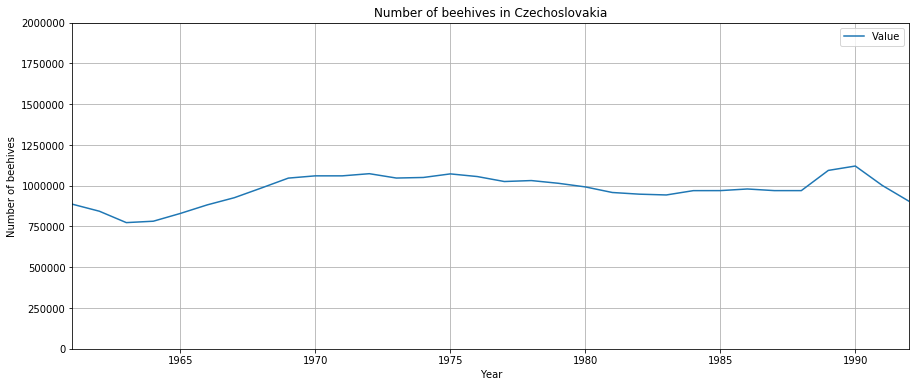

In [14]:
plot_country('Czechoslovakia')

The reason we have no data after 1992 is that the country was split and became Czechia and Slovakia. Let's build the graph as if the country never split.

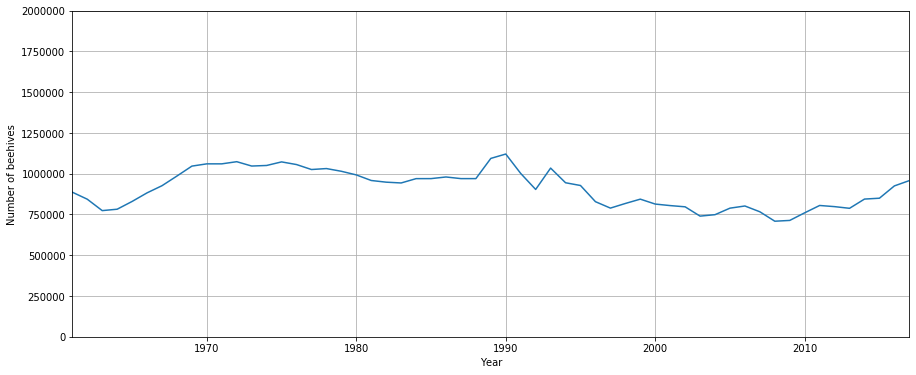

In [15]:
def extract_value(country, year):
    return beehives_raw[beehives_raw['Area'] == country].set_index('Year').loc[year].values[1]

beehives_cshh = beehives_raw[beehives_raw['Area'].isin(['Czechia', 'Slovakia'])]
beehives_cshh = beehives_cshh.pivot_table(index=['Year'], columns=['Area'], aggfunc=np.sum)
beehives_cshh.columns.names = ['Number of beehives', 'Country']
beehives_cshh[('Value', 'Czechoslovakia')] = beehives_cshh[('Value', 'Czechia')] + beehives_cshh[('Value', 'Slovakia')]
beehives_cshh = beehives_raw[beehives_raw['Area'] == 'Czechoslovakia'].set_index('Year')['Value'].append(beehives_cshh[('Value', 'Czechoslovakia')])
ax = beehives_cshh.plot(kind='line',figsize=(15,6),grid=True)
ax.set_ylabel('Number of beehives')
ax.set_ylim(bottom=0, top=2e6);

With this now complete statistic for "Czechoslovakia", we see a gloally very similar outcome than what Bulgaria experienced. But the country (-ies) did not manage to come back to their levels of before the fall of communism in Europe, even though the drop was far less impressive than for Bulgaria.

Let's analyse the next in the list, namely Germany.

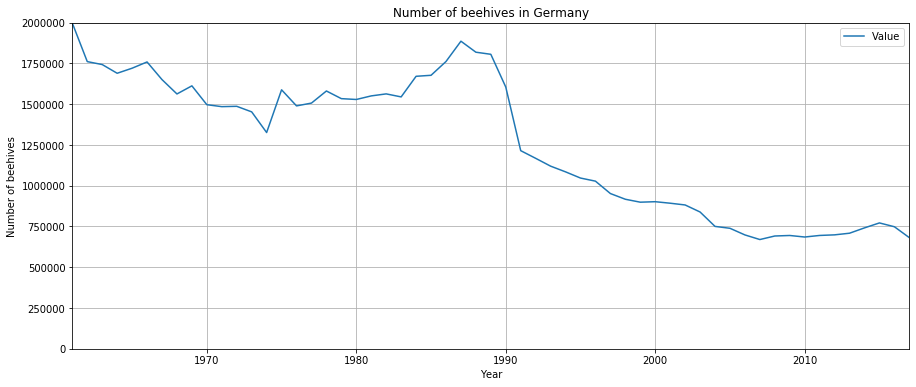

In [16]:
plot_country('Germany')

We also see a significant drop from the beginning of the 90s. Contrary to other countries previously encountered, Germany never came close to its glorious past days. We see an almost continuous decline since the end of the 80s, finally stablizing in the mid 00s. We can only suppose that bee keeping was a big factor in Eastern Germany, and since the reunification, it isn't seen as lucrative in this region Bee keepers must have simply shifted focus.

We also note that Germany was a very big "producer" of beehives in 1961, when the statistics began. This is not the case now. The numbers fell from 2 millions to ca. 700'000 (-65%).

Now, let's see Albania.

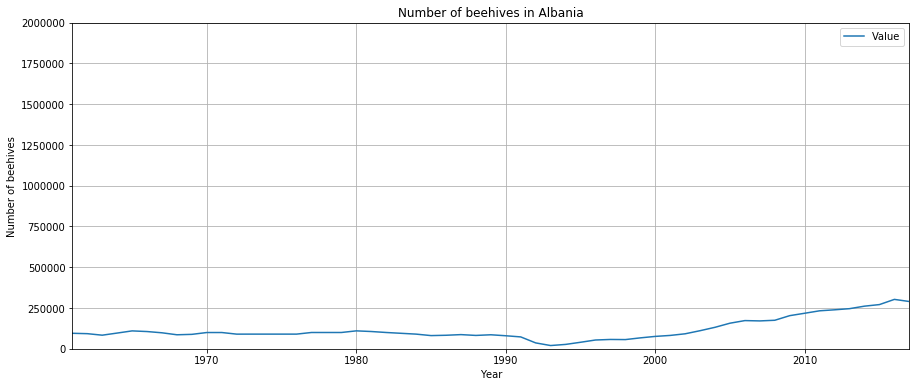

In [17]:
plot_country('Albania')

The wars in the Balkans was probably the cause of this drop. However, after this, the number of beehives grew, whereas it was only stable before these terrible events. It now has much more beehives than during the cold war.

Let's now see France.

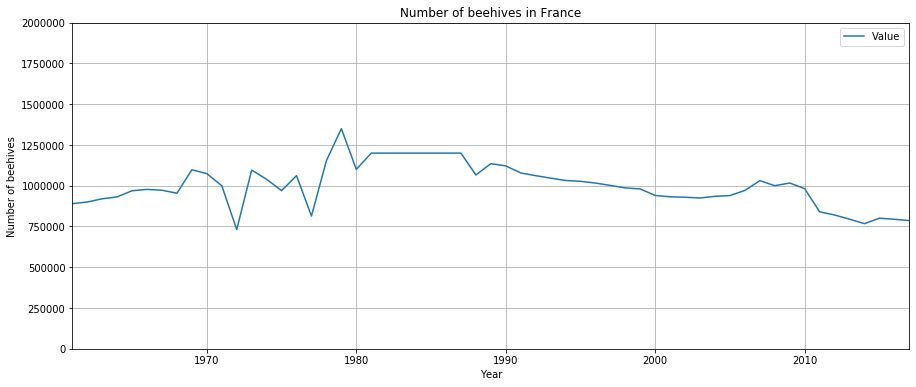

In [18]:
plot_country('France')

It looks like no updated number of beehives were given in the 80s, so the latest value was simply reported for all these years. After the 80s, we see a continuous drop in their numbers, until today, which is one of the lowest recorded numbers for France.

We can see some "glitches" in the 70s, probably due to counting - surveying - errors. It's unlikely the numbers would have changed so quickly.

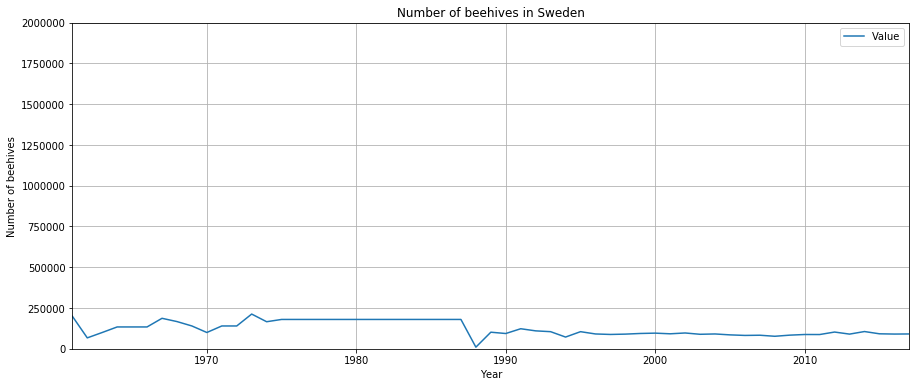

In [19]:
plot_country('Sweden')

The last country on our list, Sweden, sees their number be very stable since the 90s.

Now, let's analyze the recent gains observed in Europe.

In [20]:
beehives_eur_2010s = beehives_eur_gains.loc[beehives_eur_gains.index >= 2010]
beehives_gains_2010s = beehives_eur_2010s.max().sort_values(ascending=False)
beehives_gains_2010s = beehives_gains_2010s[beehives_gains_2010s > 2e5]
beehives_gains_2010s

Number of beehives  Country           
Value               Serbia                358954.0
                    Romania               217731.0
                    Russian Federation    200772.0
dtype: float64

We note that a few countries have known some exceptional years of growth. Let's analyze Serbia, Romania and Russia.

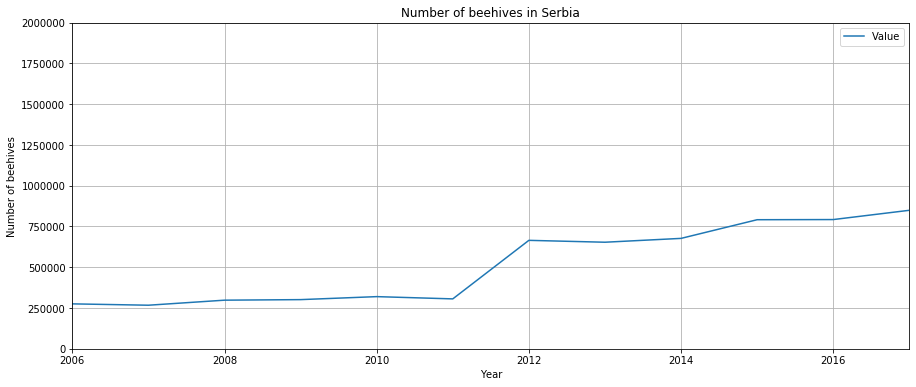

In [21]:
plot_country('Serbia')

Again, Serbia is a fairly new country, since before it was Serbia and Montenegro, and even before Yugoslavia. But this suffices to see that the grwoth observed in the 2010s is very impressive indeed, from ca. 250'000 to 800'000.

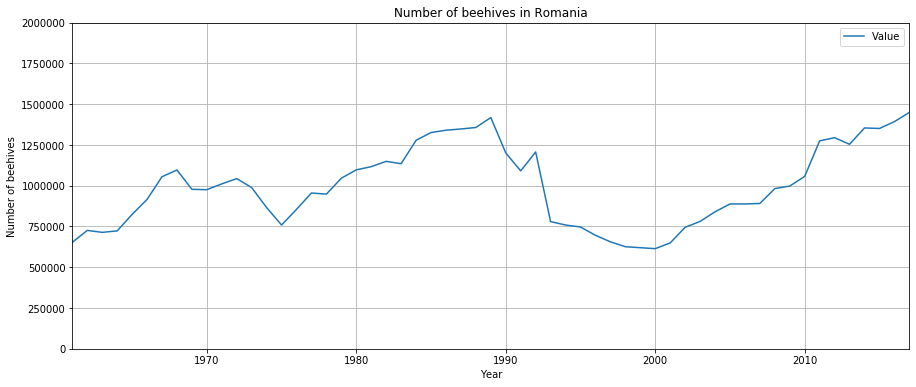

In [22]:
plot_country('Romania')

Here, we have almost a carbon copy of the behavior observed in Bulgaria. Romania just regained the levels at which they were before the fall of the Eastern Bloc.

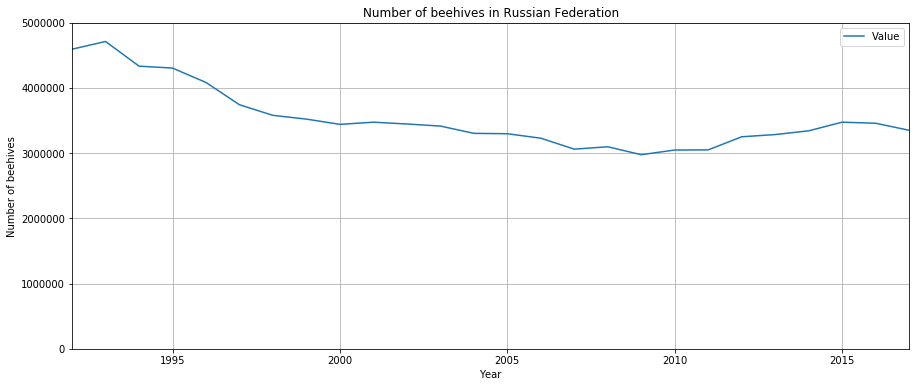

In [23]:
ax = plot_country('Russian Federation', top=5e6)

We see that Russia has an enormous number of beehives. There is a significant drop since the fall of the USSR, which seems nowadays more or less stabilized.

Let's finally see which European countries have the most beehives.

In [24]:
beehives_eur[beehives_eur.index == 2017].iloc[0].sort_values(ascending=False).head(10)

Number of beehives  Country           
Value               Russian Federation    3349976.0
                    Spain                 2904971.0
                    Poland                1589276.0
                    Greece                1561498.0
                    Romania               1449318.0
                    Serbia                 849280.0
                    Hungary                816000.0
                    France                 786172.0
                    Bulgaria               754105.0
                    Germany                681682.0
Name: 2017, dtype: float64

As we observed just before, Russia has the biggest number of behives, followed closely by Spain. Then, we have a group composed of Poland, Greece and Romania. We have then analyzed the rest of the countries.

We can conclude this portion of the analysis that the significant drop observed in Europe in the beginning of the 90s was certainly due to the fall of the USSR and the whole Eastern Bloc, and all the economic turmoil it caused.

### Asia

Firstly, let's see the biggest players in Asia.

In [25]:
beehives_asia = build_continent('Asia')
beehives_asia[beehives_asia.index == 2017].iloc[0].sort_values(ascending=False).head(10)

Number of beehives  Country                   
Value               India                         12763684.0
                    China                          9156882.0
                    China, mainland                9031457.0
                    Turkey                         7796666.0
                    Iran (Islamic Republic of)     7271825.0
                    Republic of Korea              1724389.0
                    Syrian Arab Republic            520795.0
                    Uzbekistan                      488200.0
                    Pakistan                        400019.0
                    Viet Nam                        278448.0
Name: 2017, dtype: float64

We see several outliers: India, China (which is both "China, mainland" and "China, Taiwan Province of"), Turkey and Iran. Let's see their respective evolutions.

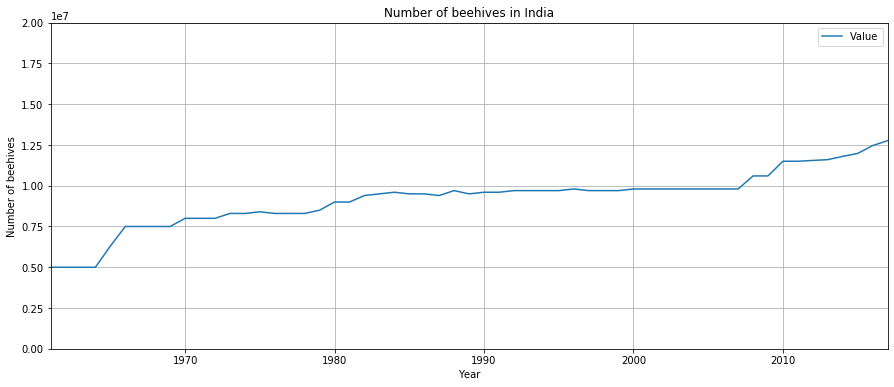

In [26]:
plot_country('India', top=2e7)

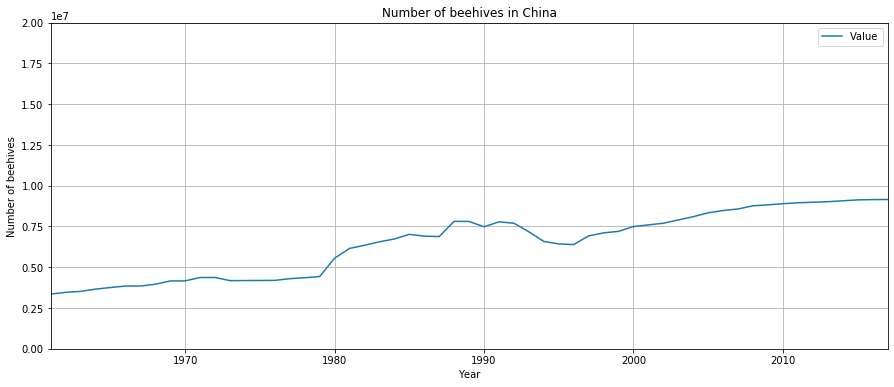

In [27]:
plot_country('China', top=2e7)

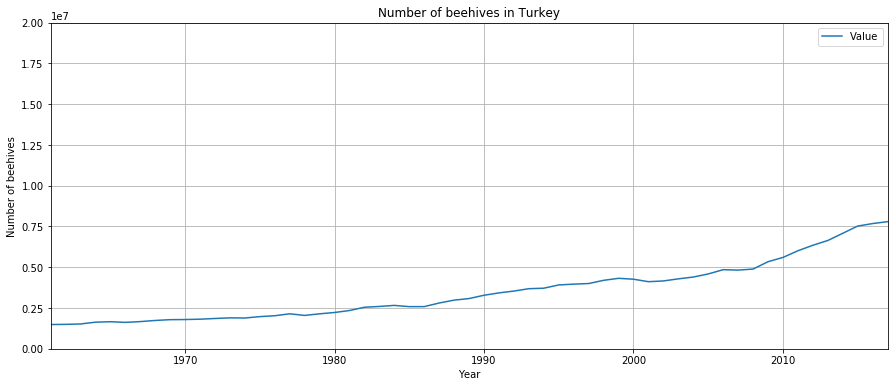

In [28]:
plot_country('Turkey', top=2e7)

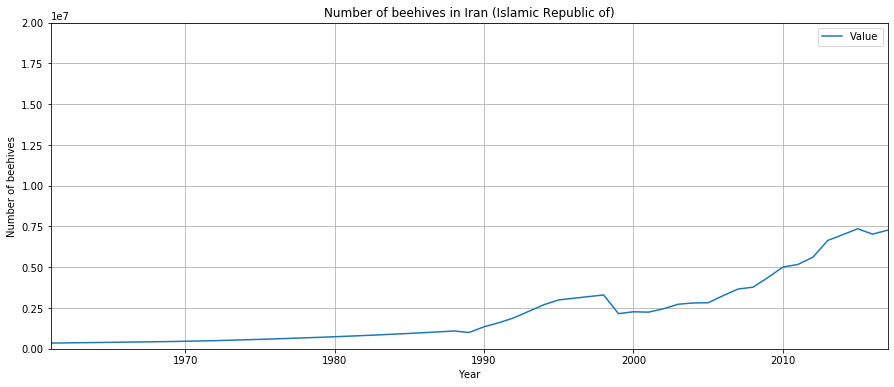

In [29]:
plot_country('Iran (Islamic Republic of)', top=2e7)

The beehive growth in these countries is mainly due to their economic growth, even if we are not sure why Turkey gained such an interest in beehives in the recent years. The global Asian growth can be reduced to the growth of these countries, since their numbers are far beyond any other country in Asia.

### Americas

Since the beehive numbers are stable in America, let's plot the biggest producers' history.

In [30]:
beehives_am = build_continent('Americas')
beehives_am[beehives_am.index == 2017].iloc[0].sort_values(ascending=False).head()

Number of beehives  Country                 
Value               Argentina                   3003036.0
                    United States of America    2669000.0
                    Mexico                      1853807.0
                    Brazil                      1012692.0
                    Canada                       692231.0
Name: 2017, dtype: float64

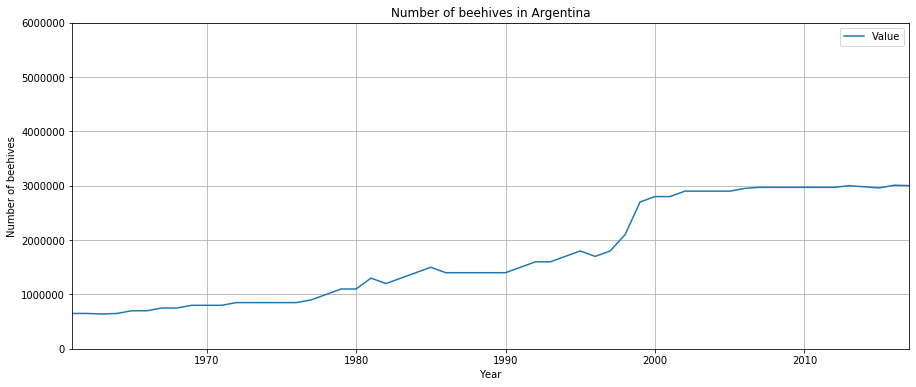

In [31]:
plot_country('Argentina', top=6e6)

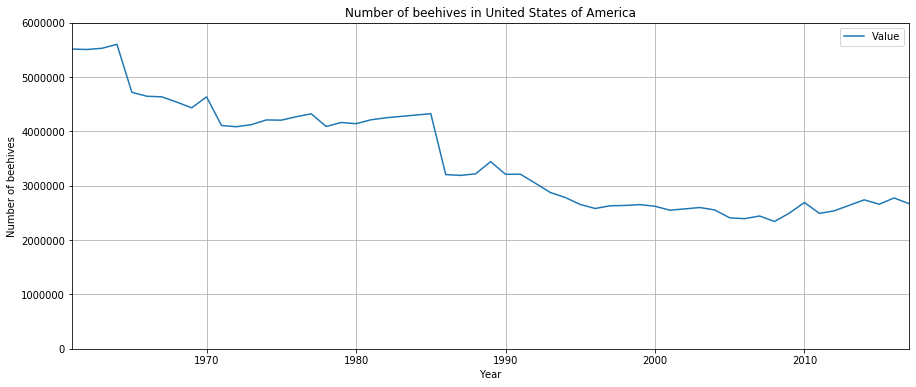

In [32]:
plot_country('United States of America', top=6e6)

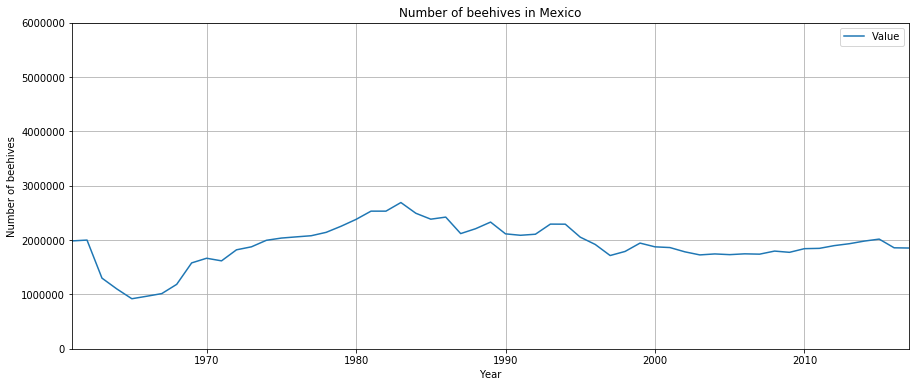

In [33]:
plot_country('Mexico', top=6e6)

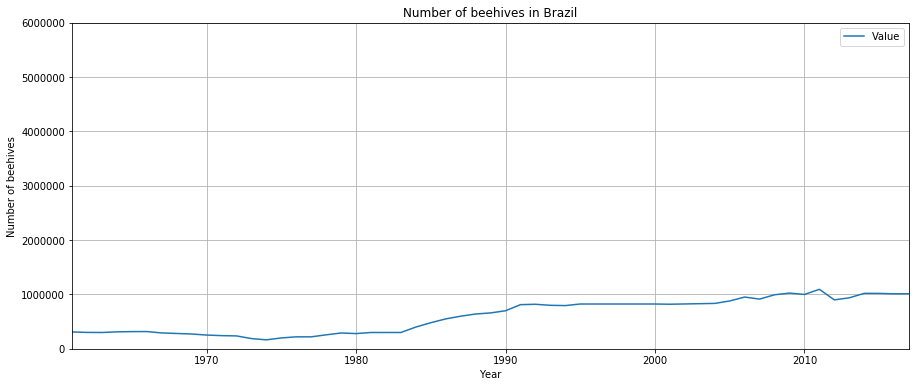

In [34]:
plot_country('Brazil', top=6e6)

We see 4 very different behaviors:
    
- Argentina has the most beehives in the Americas. Their numbers grew at first very quickly, but are stable since ca. 2000. We will come back to this in part 3.
- The US are second, but had way more beehives in the 60s. Their numbers fell until the mid 90s (they more than halved in this time period!), then stabilized.
- Mexico is overall stable for the period (1961-2017)
- Brazil saw a very big increase in the number of beehives in the 80s, and then stablized their numbers.

In conclusion, we mostly explained the big shifts in numbers of beehives using socio-economic arguments. However, we cannot say that some of these changes were not due to pests. This will be the main focus of the latter points (4-5).

## 2. How do changes in honey production relate to number of beehives in Europe and the USA?

Let's apply the same process to the honey production data than to the number of beehives, but here for both Europe and the US.

In [35]:
honey_raw = pd.read_csv('data/FAOSTAT_Livestock_Primary.csv')
honey_raw = honey_raw[['Area', 'Year', 'Value']]
honey_raw['Continent'] = honey_raw.apply(lambda row: countries.loc[row['Area']], axis=1)
honey_raw.head()

Area  Year   Value Continent
0  Afghanistan  1961  2000.0      Asia
1  Afghanistan  1962  2000.0      Asia
2  Afghanistan  1963  2000.0      Asia
3  Afghanistan  1964  2000.0      Asia
4  Afghanistan  1965  3000.0      Asia

In [36]:
honey_eur = honey_raw[honey_raw['Continent'] == 'Europe'].drop('Area', 1)
honey_eur = honey_eur.pivot_table(index=['Year'], columns=['Continent'], aggfunc=np.sum)
honey_eur.columns.names = ['Honey production in tonnes', 'Continent']

Let's check if we have the same countries as for the number of beehives.

In [37]:
honey_countries_eur = honey_raw[honey_raw['Continent'] == 'Europe']['Area'].value_counts().keys()
beehives_countries_eur = beehives_raw[beehives_raw['Continent'] == 'Europe']['Area'].value_counts().keys()
print(set(honey_countries_eur).symmetric_difference(set(beehives_countries_eur)))
print(set(honey_countries_eur) - set(beehives_countries_eur))

{'Denmark', 'Ireland', 'Norway'}
{'Ireland', 'Norway', 'Denmark'}


We see that we do not have any beehive numbers for Denmark, Ireland and Norway. Let's see what percentage of the European honey production they make up in 2017.

In [38]:
honey_prod_eur = honey_eur.loc[2017]['Value']['Europe']
honey_prod_2017 = honey_raw[honey_raw['Year'] == 2017]
honey_prod_den = honey_prod_2017[honey_prod_2017['Area'] == 'Denmark']['Value'].values[0]
honey_prod_eir = honey_prod_2017[honey_prod_2017['Area'] == 'Ireland']['Value'].values[0]
honey_prod_nor = honey_prod_2017[honey_prod_2017['Area'] == 'Norway']['Value'].values[0]
proportion = (honey_prod_den + honey_prod_eir + honey_prod_nor) / honey_prod_eur
print('Denmark, Ireland and Norway make up %f%% of the European honey production.' % (proportion * 100))

Denmark, Ireland and Norway make up 0.102713% of the European honey production.


These 3 countries make up less than one thousandth of the total European honey production, so we can safely drop them from the dataset.

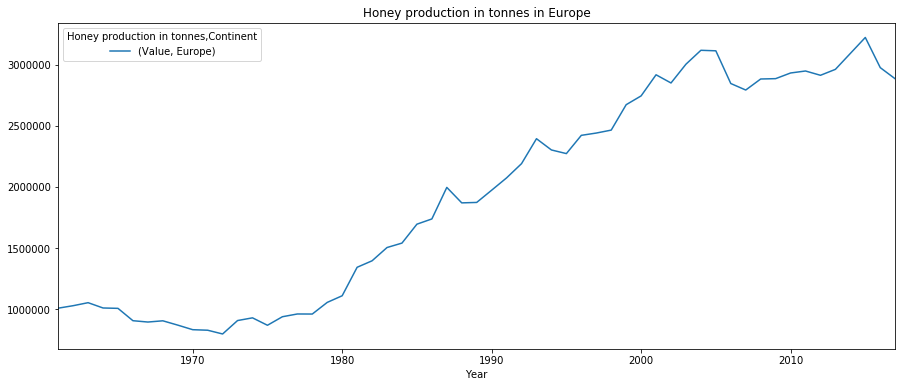

In [39]:
# Redo statistics without Denmark, Ireland and Norway
honey_eur = honey_raw[honey_raw['Continent'] == 'Europe']
honey_eur = honey_eur[honey_eur['Area'].isin(beehives_countries_eur)].drop('Area', 1)
honey_eur = honey_eur.pivot_table(index=['Year'], columns=['Continent'], aggfunc=np.sum)
honey_eur.columns.names = ['Honey production in tonnes', 'Continent']

ax = honey_eur.plot(kind='line',figsize=(15,6))
ax.set_title('Honey production in tonnes in Europe');

Here, we already see a major difference with respects to what we observed with the number of beehives. Honey production did not stop growing in the 90s, even though there was a big drop in the number of beehives.

Let's plot the differences between each year for both honey and beehives.

In [40]:
honey_derivative = honey_eur.diff() / honey_eur
honey_derivative = honey_derivative.fillna(0)[('Value', 'Europe')]

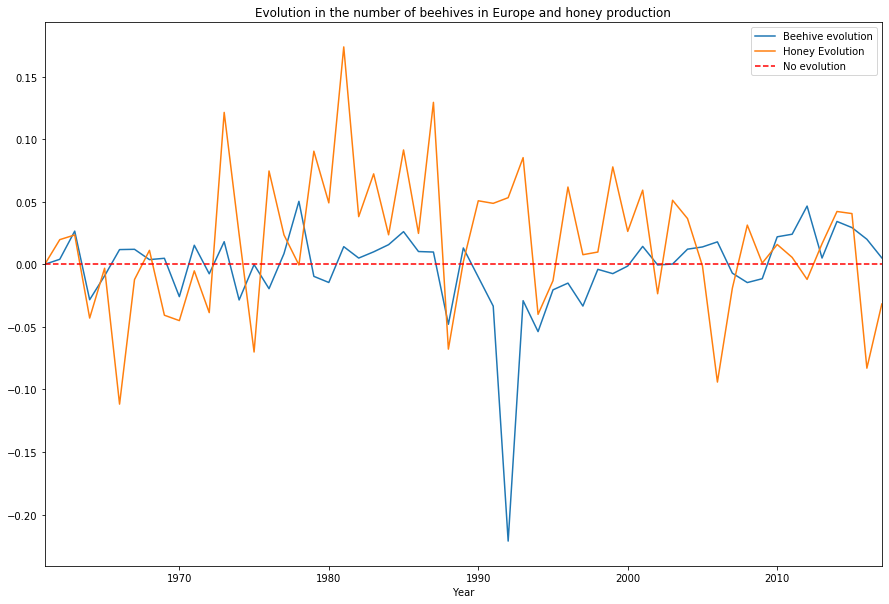

In [41]:
ax = beehives_evol_eur.plot(kind='line', figsize=(15,10), label='Beehive evolution')
honey_derivative.plot(ax=ax, label='Honey Evolution')

ax.axhline(y=0.0, color='red', linestyle='--', label='No evolution')
ax.set_title('Evolution in the number of beehives in Europe and honey production')
plt.legend();

The mean of the change per year is 1.94%.
The standard deviation of the change per year is 6.60%.


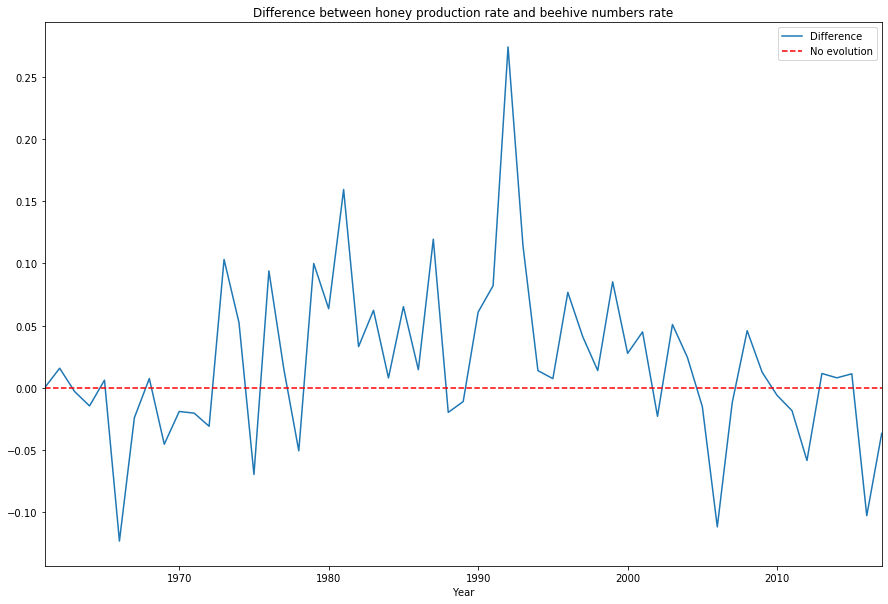

In [42]:
eur_diff = honey_derivative - beehives_evol_eur
ax = eur_diff.plot(kind='line', figsize=(15,10), label='Difference')
ax.axhline(y=0.0, color='red', linestyle='--', label='No evolution')
ax.set_title('Difference between honey production rate and beehive numbers rate')
plt.legend();
print('The mean of the change per year is %.2f%%.' % (eur_diff.mean()*100))
print('The standard deviation of the change per year is %.2f%%.' % (eur_diff.std()*100))

On this last series of graphs, we can see that the rate of honey production is very often superior to the one of the number of beehives, even though we cannot conclude anythin using the mean and standard deviation. This can mean that producers are more efficient with lesser numbers of beehives. We will later compute the correlation between these evolution, this is to simply grasp an intuitive understanding of the data.

Let's do the same thing with the US.

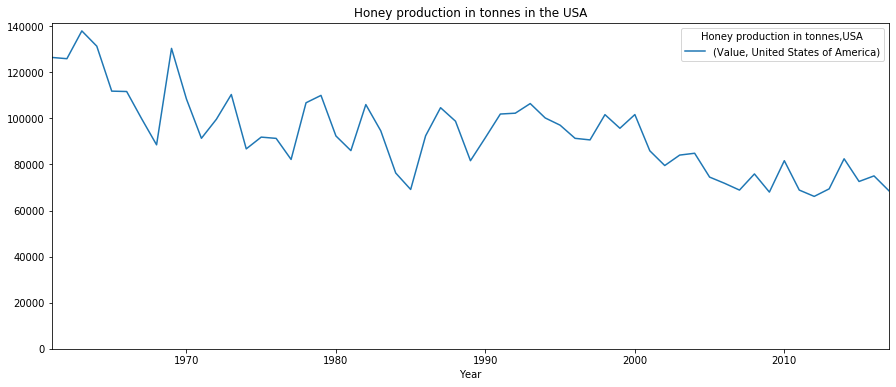

In [43]:
honey_us = honey_raw[honey_raw['Area'] == 'United States of America'].drop('Continent', 1)
honey_us = honey_us.pivot_table(index=['Year'], columns=['Area'], aggfunc=np.sum)
honey_us.columns.names = ['Honey production in tonnes', 'USA']
ax = honey_us.plot(kind='line',figsize=(15,6))
plt.ylim(bottom=0)
ax.set_title('Honey production in tonnes in the USA');

Here, on the contrary, we rather confirm that the US have far fewer beehives by looking at the honey production.

In [44]:
honey_us_derivative = honey_us.diff() / honey_us
honey_us_derivative = honey_us_derivative.fillna(0)[('Value', 'United States of America')]

In [45]:
beehives_evol_us = beehives_raw.drop('Continent', 1)
beehives_evol_us = beehives_evol_us[beehives_evol_us['Area'] == 'United States of America']
beehives_evol_us = beehives_evol_us.pivot_table(index=['Year'], columns=['Area'], aggfunc=np.sum)
beehives_evol_us.columns.names = ['Number of beehives', 'Country']

beehives_evol_us = beehives_evol_us.diff() / beehives_evol_us
beehives_evol_us = beehives_evol_us.fillna(0)[('Value', 'United States of America')]

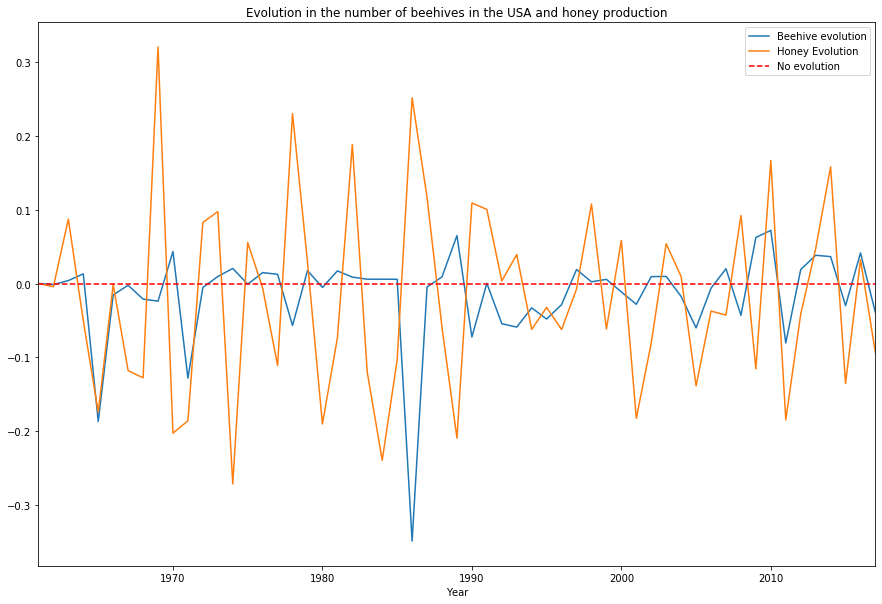

In [46]:
ax = beehives_evol_us.plot(kind='line', figsize=(15,10), label='Beehive evolution')
honey_us_derivative.plot(ax=ax, label='Honey Evolution')

ax.axhline(y=0.0, color='red', linestyle='--', label='No evolution')
ax.set_title('Evolution in the number of beehives in the USA and honey production')
plt.legend();

The mean of the change per year is -0.47%.
The standard deviation of the change per year is 15.05%.


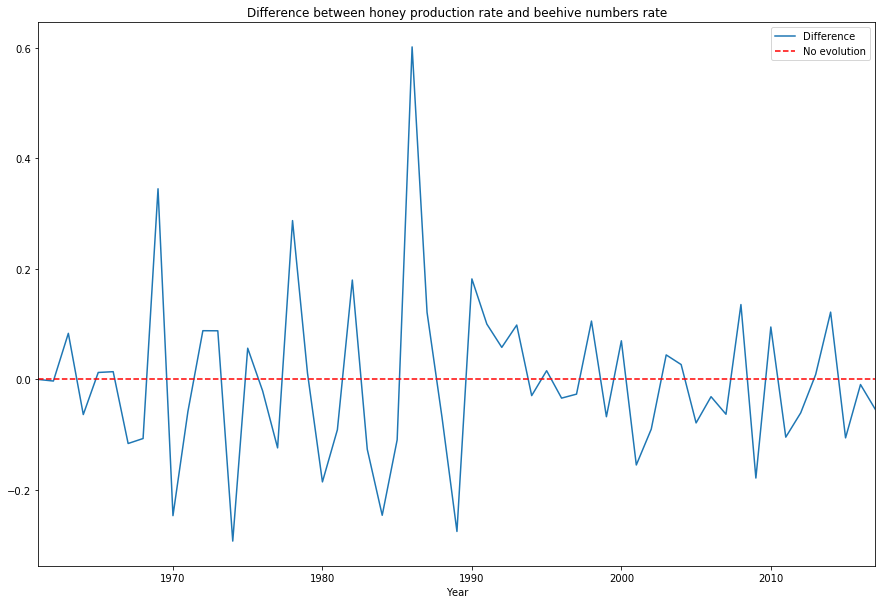

In [47]:
us_diff = honey_us_derivative - beehives_evol_us
ax = us_diff.plot(kind='line', figsize=(15,10), label='Difference')
ax.axhline(y=0.0, color='red', linestyle='--', label='No evolution')
ax.set_title('Difference between honey production rate and beehive numbers rate')
plt.legend();
print('The mean of the change per year is %.2f%%.' % (us_diff.mean()*100))
print('The standard deviation of the change per year is %.2f%%.' % (us_diff.std()*100))

Here, contrary to Europe, we even see an overall mean that is negative, meaning that honey production drops (on a year-by-year basis) more than the number of beehives, or that it grows less.

However, we again have a high standard deviation (due to the small number of years we have to work on). So, let's compute the correlation of the values to confirm our intuition.

In [48]:
eu_corr = honey_eur[('Value', 'Europe')].to_frame().corrwith(beehives[('Value', 'Europe')])[('Value', 'Europe')]
print('We observe a correlation of %.3f between honey production and number of beehives in Europe.' % eu_corr)

We observe a correlation of -0.802 between honey production and number of beehives in Europe.


In [49]:
us_corr = honey_us[('Value', 'United States of America')].to_frame().corrwith(beehives_raw[beehives_raw['Area'] == 'United States of America'].set_index('Year')['Value'])[('Value', 'United States of America')]
print('We observe a correlation of %.3f between honey production and number of beehives in the USA.' % us_corr)

We observe a correlation of 0.674 between honey production and number of beehives in the USA.


We see a significant negative correlation between the number of beehives and honey production in Europe, meaning that bee keepers are more and more efficient as time goes on.

And, as seen with our previous graphs, we observe the opposite in the US, where both numbers seem to fall at the same time. We will explain this phenomenon in part 5.

## 3. What are the consequences of bee decline on the patterns of honey import/export around the world?

Eric

# 4. US Case Study: Colony Collapse Disorder (CCD)

The cause (or causes) of **Colony Collapse Disorder (CCD)** is not quite clear. It is thought to have several plausible causes, including:

- Pesticide use
- Environmental stresses
- Bee pests (most specifically the Varroa)

In this section, we investigate the influence of bee pests.

In [50]:
loss_all = pd.read_excel("data/Bee Colony Loss.xlsx")
varroa_all = pd.read_csv("data/USDA_varroa.csv")

In [51]:
# State codes
states = {'alaska': 'AK',
 'alabama': 'AL',
 'arkansas': 'AR',
 'american samoa': 'AS',
 'arizona': 'AZ',
 'california': 'CA',
 'colorado': 'CO',
 'connecticut': 'CT',
 'district of columbia': 'DC',
 'delaware': 'DE',
 'florida': 'FL',
 'georgia': 'GA',
 'guam': 'GU',
 'hawaii': 'HI',
 'iowa': 'IA',
 'idaho': 'ID',
 'illinois': 'IL',
 'indiana': 'IN',
 'kansas': 'KS',
 'kentucky': 'KY',
 'louisiana': 'LA',
 'massachusetts': 'MA',
 'maryland': 'MD',
 'maine': 'ME',
 'michigan': 'MI',
 'minnesota': 'MN',
 'missouri': 'MO',
 'northern mariana islands': 'MP',
 'mississippi': 'MS',
 'montana': 'MT',
 'national': 'NA',
 'north carolina': 'NC',
 'north dakota': 'ND',
 'nebraska': 'NE',
 'new hampshire': 'NH',
 'new jersey': 'NJ',
 'new mexico': 'NM',
 'nevada': 'NV',
 'new york': 'NY',
 'ohio': 'OH',
 'oklahoma': 'OK',
 'oregon': 'OR',
 'pennsylvania': 'PA',
 'puerto rico': 'PR',
 'rhode island': 'RI',
 'south carolina': 'SC',
 'south dakota': 'SD',
 'tennessee': 'TN',
 'texas': 'TX',
 'utah': 'UT',
 'virginia': 'VA',
 'virgin islands': 'VI',
 'vermont': 'VT',
 'washington': 'WA',
 'wisconsin': 'WI',
 'west virginia': 'WV',
 'wyoming': 'WY'}

### Varroa preprocessing

In [52]:
varroa_all.head(3)

Program  Year        Period  Week Ending Geo Level     State  State ANSI  \
0  SURVEY  2019  JAN THRU MAR          NaN  NATIONAL  US TOTAL         NaN   
1  SURVEY  2019  JAN THRU MAR          NaN  NATIONAL  US TOTAL         NaN   
2  SURVEY  2019  JAN THRU MAR          NaN     STATE   ALABAMA         1.0   

   Ag District  Ag District Code  County  ...  Zip Code  Region  \
0          NaN               NaN     NaN  ...       NaN     NaN   
1          NaN               NaN     NaN  ...       NaN     NaN   
2          NaN               NaN     NaN  ...       NaN     NaN   

   watershed_code  Watershed  Commodity  \
0               0        NaN      HONEY   
1               0        NaN      HONEY   
2               0        NaN      HONEY   

                                           Data Item Domain Domain Category  \
0  HONEY, BEE COLONIES, AFFECTED BY PESTS ((EXCL ...  TOTAL   NOT SPECIFIED   
1  HONEY, BEE COLONIES, AFFECTED BY VARROA MITES ...  TOTAL   NOT SPECIFIED   
2  HONEY, BEE COLONIES, AFFECTED BY PESTS ((EXCL ...  TOTAL   NOT SPECIFIED   

  Value CV (%)  
0  14.8    NaN  
1  45.6    NaN  
2  22.7    NaN  

[3 rows x 21 columns]

In [53]:
VARROA_TO_KEEP = ['Year', 'Period', 'State', 'Data Item', 'Value']
varroa_all = varroa_all[VARROA_TO_KEEP]

varroa_all.columns = [column.strip().lower() for column in varroa_all.columns]

In [54]:
varroa_all['data item'].value_counts()

HONEY, BEE COLONIES, AFFECTED BY VARROA MITES - INVENTORY, MEASURED IN PCT OF COLONIES                   802
HONEY, BEE COLONIES, AFFECTED BY PESTS ((EXCL VARROA MITES)) - INVENTORY, MEASURED IN PCT OF COLONIES    799
SUPPLIES & REPAIRS, APIARY, VARROA CONTROL & TREATMENT - EXPENSE, MEASURED IN $                            7
HONEY, BEE COLONIES, AFFECTED BY PESTS (EXCL VARROA MITES) - INVENTORY, MEASURED IN PCT OF COLONIES        3
Name: data item, dtype: int64

In [55]:
# We get rid of 'SUPPLIES & REPAIRS, APIARY, VARROA CONTROL & TREATMENT - EXPENSE, MEASURED IN $'
varroa_all = varroa_all[varroa_all['data item'] != 'SUPPLIES & REPAIRS, APIARY, VARROA CONTROL & TREATMENT - EXPENSE, MEASURED IN $']

# We get rid of US totals (which gets rid of the above HONEY, BEE COLONIES, AFFECTED BY PESTS (EXCL VARROA MITES) - INVENTORY, MEASURED IN PCT OF COLONIES)
varroa_all = varroa_all[varroa_all.state != 'US TOTAL']

# States => lowercase => 2-letters symbol
varroa_all.state = varroa_all.state.apply(str.lower)
varroa_all.replace(to_replace=states, inplace=True) 

In [56]:
for value in varroa_all.value:
    try:
        float(value)
    except:
        print(value)

 (Z)
 (Z)
 (Z)
 (Z)
 (Z)


In [57]:
varroa_all = varroa_all[varroa_all.value != ' (Z)']
varroa_all.value = varroa_all.value.apply(float)

# Replace month ranges (e.g. 'JAN THRU MARCH') by quarters
quarters = {
    'JAN THRU MAR': 'Q1',
    'APR THRU JUN': 'Q2',
    'JUL THRU SEP': 'Q3',
    'OCT THRU DEC': 'Q4'
}

varroa_all.replace(to_replace=quarters, inplace=True) 

# Discard 2019 (not enough data, and it's not over)
varroa_all = varroa_all[varroa_all.year != 2019]

In [58]:
# We separate Varroa from Non-varroa
varroa = varroa_all[varroa_all['data item'] == 'HONEY, BEE COLONIES, AFFECTED BY VARROA MITES - INVENTORY, MEASURED IN PCT OF COLONIES']
varroa.drop(columns=['data item'], inplace=True)

non_varroa = varroa_all[varroa_all['data item'] == 'HONEY, BEE COLONIES, AFFECTED BY PESTS ((EXCL VARROA MITES)) - INVENTORY, MEASURED IN PCT OF COLONIES']
non_varroa.drop(columns=['data item'], inplace=True)

/home/robin/.local/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
varroa.head(3)

year period state  value
98   2018     Q1    AL   29.2
100  2018     Q1    AZ   36.3
102  2018     Q1    AR   21.1

### Loss preprocessing


In [60]:
loss_all.head(3)

Year  Season          State   Total Annual Loss   Beekeepers  \
0  2016/17  Annual  Massachusetts               0.159           87   
1  2016/17  Annual        Montana               0.171           21   
2  2016/17  Annual         Nevada               0.230           13   

    Beekeepers Exclusive to State   Colonies   Colonies Exclusive to State  
0                           0.943      27186                         0.023  
1                           0.524      35905                         0.003  
2                           0.923       2512                         0.052

As per the [source](https://data.world/finley/bee-colony-statistical-data-from-1987-2017), **Total annual loss** is the percentage of colony lost during that year

In [61]:
# Cleaning 

# Clean header
loss_all.columns = [column.strip().lower() for column in loss_all.columns]

# Season is always Annual 
loss_all.drop('season', axis=1, inplace=True)

# 2016/17 => 2016
loss_all.year = loss_all.year.apply(lambda x: int(x[:-3]))

# lowercase the state and convert to 2-letters symbol
loss_all.state = loss_all.state.apply(str.lower)
loss_all.replace(to_replace=states, inplace=True) 

# Convert 0.2 => 20%
loss_all['total annual loss'] *= 100

In [62]:
loss_all.head(3)

year state  total annual loss  beekeepers  beekeepers exclusive to state  \
0  2016    MA               15.9          87                          0.943   
1  2016    MT               17.1          21                          0.524   
2  2016    NV               23.0          13                          0.923   

   colonies  colonies exclusive to state  
0     27186                        0.023  
1     35905                        0.003  
2      2512                        0.052

# Where are the bees dying ?

## Average amount of colonies per State 
#### 2010-2016

First we need to **better understand how the states compares to each other**.

To answer this question, we plot the amount of colonies per state.

In [63]:
loss_all['total annual loss (colonies)'] = loss_all['total annual loss']/100*loss_all['colonies']

loss_per_state = loss_all.groupby('state').mean().reset_index()


In [64]:
loss_per_state.dropna(inplace=True)

In [65]:
loss_per_state.head()

state    year  total annual loss  beekeepers  beekeepers exclusive to state  \
1    AL  2013.0          35.942857   32.000000                       0.951857   
2    AR  2013.0          37.642857   41.857143                       0.926000   
3    AZ  2013.0          40.614286    7.571429                       0.829429   
4    CA  2013.0          35.714286  187.428571                       0.689857   
5    CO  2013.0          38.442857  124.142857                       0.975143   

        colonies  colonies exclusive to state  total annual loss (colonies)  
1     645.142857                     0.843571                    246.218000  
2    3188.285714                     0.526143                   1137.565143  
3     988.142857                     0.475714                    333.740857  
4  380262.285714                     0.136286                 141950.298429  
5   24208.714286                     0.508857                   7977.655286

In [66]:
fig = go.Figure(data=go.Choropleth(
    locations=loss_per_state['state'],
    z=loss_per_state['colonies'].astype(float).apply(round),
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title='Average amount of colonies [unit]',
))

fig.update_layout(
    title_text = '<b>Average amount of colonies [unit]</b> per State <br> 2010-2016 ',
    geo_scope='usa', # limite map scope to USA
    dragmode=False
)

fig.show()

### Analysis

As we can see, the three states with the most colonies are **California**, **North-Dakota** and **Texas**. 

This makes sense because of **migratory beekeeping**. Indeed, nowadays, most of a beekeeper's revenue comes from renting his bees to polinisation. [[1]](???)

**California** produces **80% of the world's almond production** [[2]](https://www.marketwatch.com/story/almond-crunch-california-drought-withers-world-supply-2014-03-11), and they rely heavily on honeybees for their polinization. [[3]](https://theconversation.com/a-bee-economist-explains-honey-bees-vital-role-in-growing-tasty-almonds-101421). The blooming period is during the first quarter, from February to March.

Then, beekeepers move their bees to **North-Dakota** where lots of the honey is produced by gorging on alfalfa, sunflowers and clovers.

They also go to **Texas**, to polinate pumpkins and cucumbers.

Another hotspot is **Florida**, where bees are needed to polinate blueberries, tupelos and brazilian pepper, all the way from February to September. [[4]](https://www.scientificamerican.com/article/migratory-beekeeping-mind-boggling-math/)

These migratory patterns can also be seen by how many of the colonies are actually exclusive to their state (see below). 
As we can see, **very little of the colonies** (1%-13%) in those four states are exlusive to it.


In [67]:
fig = go.Figure(data=go.Choropleth(
    locations=loss_per_state['state'],
    z=loss_per_state['colonies exclusive to state'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title='Fraction of colonies exclusive to the State [%]',
))

fig.update_layout(
    title_text = '<b>Fraction of colonies exclusive to the State [%]</b>, per State <br> 2010-2016 ',
    geo_scope='usa', # limite map scope to USA
    dragmode=False
)

fig.show()

## Yearly loss of colonies [%]
#### 2010-2016

Now that we know where the colonies are located, where are they dying ?

We here investigate the **average yearly colony loss** for 2010-2016. That is, we want to know the percentage of colonies lost each year throughout the US.

Text(0, 0.5, 'Yearly colony loss [%]')

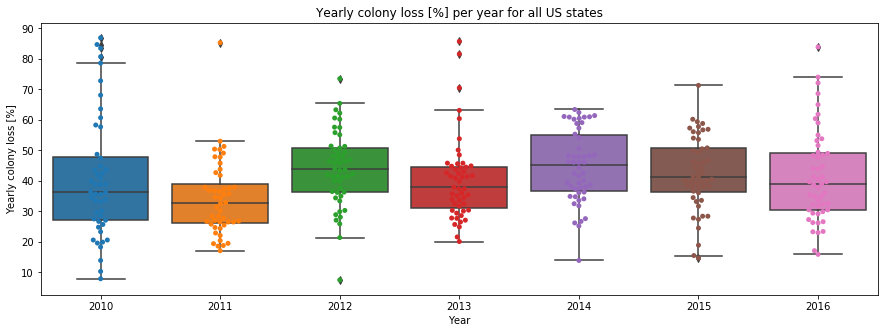

In [68]:
plt.figure(figsize=(15,5))
sns.boxplot(y='total annual loss', x='year', data=loss_all)
sns.swarmplot(y='total annual loss', x='year', data=loss_all)
plt.title('Yearly colony loss [%] per year for all US states')
plt.xlabel('Year')
plt.ylabel('Yearly colony loss [%]')

### Analysis:

In all the states, colonies are being lost. Between 2010 and 2016, the **median yearly colony loss** is roughly **stable**, albeit **very high** (~40%). Additionally, we have a **lot of variance**, with values ranging from 10% to 90%.

## Average yearly loss of colonies [%] per State
#### 2010-2016


We see in the previous boxplot that the **yearly colony losses are well spread out** (with values ranging from 10 to 90%).

We now investigate how each state compares in terms of **average yearly loss of colonies**, to see if there are any major discrepancies. That is, do some states have consistantly bigger losses ?

In [69]:
fig = go.Figure(data=go.Choropleth(
    locations=loss_per_state['state'],
    z=loss_per_state['total annual loss'].astype(float).apply(round),
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title='Average yearly loss [%]',
))

fig.update_layout(
    title_text = '<b>Average yearly loss [%] of colonies</b> per State <br> 2010-2016 ',
    geo_scope='usa', # limite map scope to USA
    dragmode=False
)

fig.show()

### Analysis

As we can see, the **average yearly loss** accross the US is **quite high**, and **affects all states**. There is however  **more colony loss on the east coast** than the west coast. But how does that translate in terms of **amount of colonies lost** ?


In [70]:
fig = go.Figure(data=go.Choropleth(
    locations=loss_per_state['state'],
    z=loss_per_state['total annual loss (colonies)'].astype(float).apply(round),
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title='Average yearly loss [unit]',
))

fig.update_layout(
    title_text = '<b>Average yearly loss [unit] of colonies</b> per State <br> 2010-2016 ',
    geo_scope='usa', # limite map scope to USA
    dragmode=False
)

fig.show()

### Analysis 

As we can see, more bees are dying in **California**, **North-Dakota** and **Texas**, which is where most bees are located. 
This makes sense given the migratory patterns we have seen.

# Why are the bees dying ?

Now that we know where in the US they are dying, we will investigate possible reasons for this downfall.

Several factors are thought to be culprits of the CCD (Colony Collapse Disorder). Amongst which :

- Bee pests 
- Pesticide use 

We will now investigate those two factors.

## Bee pests 

Bees can be affected by several pests. The most well known of which is the **Varroa Mite**: a little bug, smaller than the bee, that attaches itself onto a bee and slowly kills it.

We will now investigate this pest.

In [71]:
varroa.head(3)

year period state  value
98   2018     Q1    AL   29.2
100  2018     Q1    AZ   36.3
102  2018     Q1    AR   21.1

In [72]:
non_varroa.head(3)

year period state  value
97   2018     Q1    AL   30.2
99   2018     Q1    AZ    4.3
101  2018     Q1    AR    9.6

## Varroa per season
#### 2015-2019

How does the fraction of colonies affected by the Varroa evolve throughout seasons ? 

Text(0, 0.5, 'Fraction of colonies affected the by Varroa [%]')

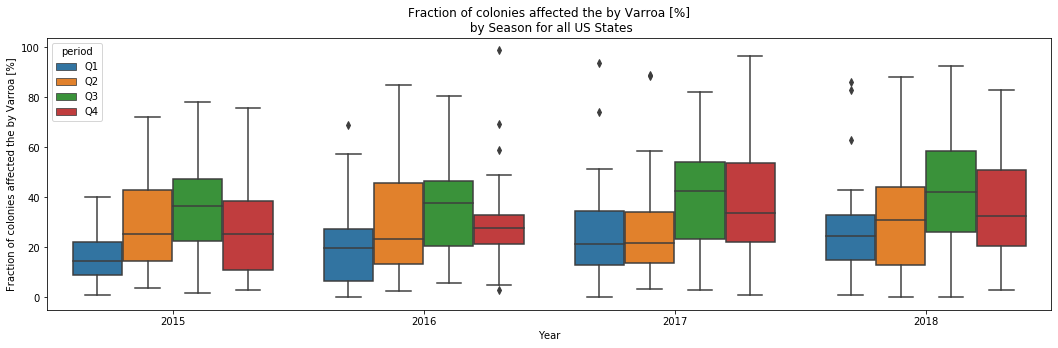

In [73]:
plt.figure(figsize=(18,5))
sns.boxplot(y='value', x='year', hue='period', data=varroa)
plt.title('Fraction of colonies affected the by Varroa [%]\n by Season for all US States')
plt.xlabel('Year')
plt.ylabel('Fraction of colonies affected the by Varroa [%]')

### Analysis

As we can see, the **fraction of colonies infected increased from winter to summer** before plummetting in automn. This makes sense since the Varroa is sensitive to the drop in temperature.

## Fraction of colonies affected by Varroa Mites in summer and winter
#### 2015-2019

We have now seen that the Varroa Mites are the most populous in summer, but how spread out is the Varroa throughout the US ?

To answer this, we plot the fraction of colonies affected by the Varroa when it is at both peaks, i.e. in summer and winter

In [74]:
varroa_per_state = varroa.groupby(['state', 'period']).mean()['value'].reset_index()

varroa_per_state.head(3)

state period   value
0    AL     Q1  20.825
1    AL     Q2  17.350
2    AL     Q3  55.450

In [75]:
for quarter, word in zip(['Q1', 'Q3'], ['1st', '3rd']):
    fig = go.Figure(data=go.Choropleth(
        locations=varroa_per_state[varroa_per_state.period == quarter]['state'],
        z=varroa_per_state[varroa_per_state.period == quarter]['value'].astype(float).apply(round),
        locationmode='USA-states',
        colorscale='Reds',
        colorbar_title='Fraction of affected colonies [%]',
    ))

    fig.update_layout(
        title_text = '<b>Average fraction of colonies affected by Varroa Mites [%]</b> per State, in the <b>' + word + ' quarter</b> <br> Averaged over 2015-2018',
        geo_scope='usa', # limite map scope to USA
        dragmode=False
    )

    fig.show()

### Analysis 

Varroas are a **widespread problem**, affecting between 20 and 50% of all colonies within a state. 

In the **summer**, the Varroas of the **North-East** tend to **die off**, while the rest of the US maintains a high count of Varroas.

This is especially an issue since **California** is the **state with the most colonies** by far, and it also is one of the states with the most varroas per colonies in the winter.

Unfortunately, February to March is precisely when the almond trees bloom, and hence when the bees are in California.

## What about the other pests ?

Varroas have been a hot-topic in the bee community, but what about other pests ? Are they as widespread and as endemic ?

In [76]:
non_varroa

year period state  value
97    2018     Q1    AL   30.2
99    2018     Q1    AZ    4.3
101   2018     Q1    AR    9.6
103   2018     Q1    CA   11.3
105   2018     Q1    CO    0.8
...    ...    ...   ...    ...
1601  2015     Q4    VA   17.2
1603  2015     Q4    WA    0.1
1605  2015     Q4    WV    4.5
1607  2015     Q4    WI   15.6
1609  2015     Q4    WY    3.3

[733 rows x 4 columns]

Text(0, 0.5, 'Fraction of colonies affected the by pest \n (excluding the Varroa) [%]')

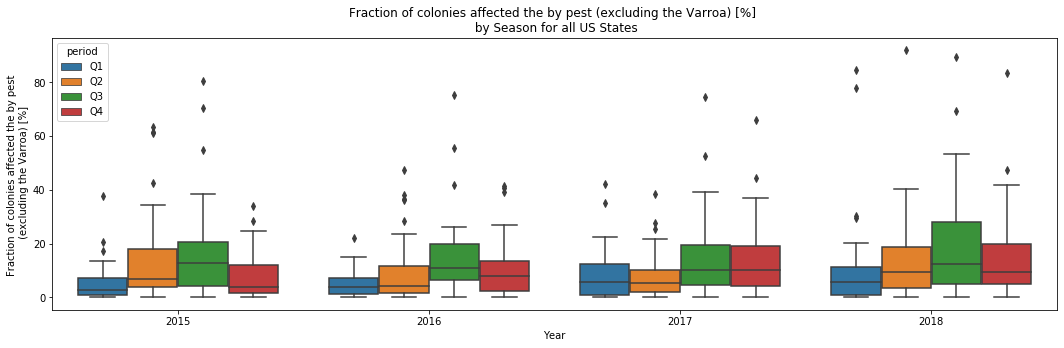

In [77]:
plt.figure(figsize=(18,5))
sns.boxplot(y='value', x='year', hue='period', data=non_varroa)
plt.title('Fraction of colonies affected the by pest (excluding the Varroa) [%] \n by Season for all US States')
plt.xlabel('Year')
plt.ylabel('Fraction of colonies affected the by pest \n (excluding the Varroa) [%]')

## Analysis 


Other pests follow the same patterns (i.e. growing from end of the winter to summer, and dying off in winter). Additionally, they are **well widespread** throughout the US, affecting each state. However, **Varroas are more endemic**, affecting far more beehives. We however notice a lot of outliers.

## Pesticide

Another potential culprit is the use of pesticide. In 2013, Europe banned the use of neonicotinoid, a pesticide believed to contribute to CCD [[1]](https://en.wikipedia.org/wiki/Colony_collapse_disorder#Bee_rentals_and_migratory_beekeeping).

Unfortunately, the data available from the USDA concerning pesticide does not contain pesticide-specific data. Is there however similar patterns between CCD and pesticide use ?



In [78]:
pesti = pd.read_csv("data/USDA_pesticide.csv")
pesti.head()

Program  Year        Period  Week Ending Geo Level       State  State ANSI  \
0  SURVEY  2019  JAN THRU MAR          NaN  NATIONAL    US TOTAL         NaN   
1  SURVEY  2019  JAN THRU MAR          NaN     STATE     ALABAMA         1.0   
2  SURVEY  2019  JAN THRU MAR          NaN     STATE     ARIZONA         4.0   
3  SURVEY  2019  JAN THRU MAR          NaN     STATE    ARKANSAS         5.0   
4  SURVEY  2019  JAN THRU MAR          NaN     STATE  CALIFORNIA         6.0   

   Ag District  Ag District Code  County  ...  Zip Code  Region  \
0          NaN               NaN     NaN  ...       NaN     NaN   
1          NaN               NaN     NaN  ...       NaN     NaN   
2          NaN               NaN     NaN  ...       NaN     NaN   
3          NaN               NaN     NaN  ...       NaN     NaN   
4          NaN               NaN     NaN  ...       NaN     NaN   

   watershed_code  Watershed  Commodity  \
0               0        NaN      HONEY   
1               0        NaN      HONEY   
2               0        NaN      HONEY   
3               0        NaN      HONEY   
4               0        NaN      HONEY   

                                           Data Item Domain Domain Category  \
0  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...  TOTAL   NOT SPECIFIED   
1  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...  TOTAL   NOT SPECIFIED   
2  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...  TOTAL   NOT SPECIFIED   
3  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...  TOTAL   NOT SPECIFIED   
4  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...  TOTAL   NOT SPECIFIED   

  Value CV (%)  
0  13.6    NaN  
1   0.3    NaN  
2  16.2    NaN  
3  55.3    NaN  
4  12.3    NaN  

[5 rows x 21 columns]

In [79]:
# Clean header
pesti.columns = [column.strip().lower() for column in pesti.columns]

# lowercase the state
pesti.state = pesti.state.apply(str.lower)

# Discard the 3 rows with less than 5 hives
pesti = pesti[pesti.domain == 'TOTAL']

# Keep relevant columns
PESTI_TO_KEEP = ['year', 'period', 'state', 'value']
pesti = pesti[PESTI_TO_KEEP]

# Replace month ranges by quarters
pesti.replace(to_replace=quarters, inplace=True)

# Discard rows where the value wasn't reported 
pesti = pesti[pesti.value.apply(lambda x: x != ' (Z)')] # only keep US states
pesti.value = pesti.value.apply(float)

# Replace state by 2-letters symbol
pesti.replace(to_replace=states, inplace=True)

# only keep US states
pesti = pesti[pesti.state.apply(lambda x: x in states.values())] 

# Discard 2019
pesti = pesti[pesti.year != 2019]

In [80]:
pesti.head(3)

year period state  value
48  2018     Q1    AL   14.9
49  2018     Q1    AZ   15.3
50  2018     Q1    AR   23.0

In [81]:
pesti_per_state = pesti.groupby(['state', 'period']).mean().reset_index()

In [82]:
for quarter, word in zip(['Q1', 'Q2', 'Q3', 'Q4'], ['1st', '2nd', '3rd', '4th']):
    fig = go.Figure(data=go.Choropleth(
        locations=pesti_per_state[pesti_per_state.period == quarter]['state'],
        z=pesti_per_state[pesti_per_state.period == quarter]['value'].astype(float).apply(round),
        locationmode='USA-states',
        colorscale='Reds',
        colorbar_title='Fraction of colonies affected by pesticides [%]',
    ))

    fig.update_layout(
        title_text = '<b>Fraction of colonies affected by pesticides [%]</b> per State, in <b>' + word + ' Quarter</b> <br> 2015-2018',
        geo_scope='usa', # limite map scope to USA
        dragmode=False
    )

    fig.show()

### Analysis 

Pesticide levels increase from the 1st to the 4th quarter all over the US. But is there a correlation ?

We investigate below the pesticide levels per colony losses to see if we can see a meaningful correlation.



In [83]:
# We average over the period, since we only have annual data for the colony losses
pesti_per_year = pesti.groupby(['year', 'state']).mean().reset_index()


In [84]:
pesti_per_year = pd.merge(pesti_per_year, loss_all[['year', 'state', 'total annual loss']], on=['year', 'state'])

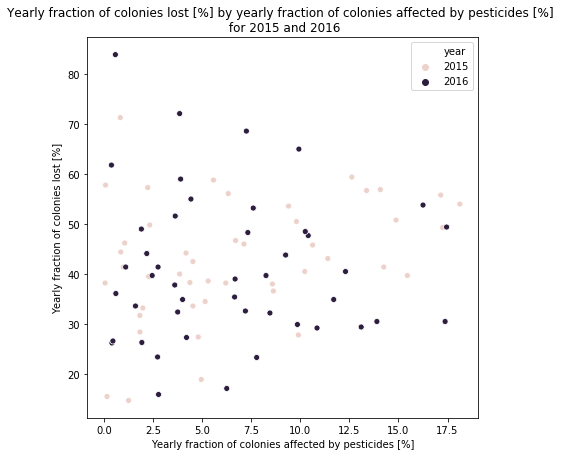

In [85]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='value', y='total annual loss', hue='year', data=pesti_per_year, legend='full')
plt.xlabel('Yearly fraction of colonies affected by pesticides [%]')
plt.ylabel('Yearly fraction of colonies lost [%]')
plt.title('Yearly fraction of colonies lost [%] by yearly fraction of colonies affected by pesticides [%] \n for 2015 and 2016')
plt.show()

### Analysis

We see no correlation between the fraction of colonies affected by pesticides and the fraction of colony lost. 

This however does not discredit the pesticide theory. One specific pesticide (neonicotinoids) is thought to be one of the culprit of CCD. Unfortunately, our dataset aggregates all the pesticides together. The lack of correlation could be due to the use of pesticide not arming bees and others arming bees.

## 5. California accounts for 80% of the world almond production, what is the impact of bees on this industry in the 21st century?

Calfornia is responsible for more than 80% of the world almond production. [[1]](https://www.marketwatch.com/story/almond-crunch-california-drought-withers-world-supply-2014-03-11)
Almonds need honey bees to be polinized. [[2]](https://theconversation.com/a-bee-economist-explains-honey-bees-vital-role-in-growing-tasty-almonds-101421)

As we have seen above, **California** has an **average annual loss** of colonies of **36%**. 
What does this mean in terms of Almonds production ?


In [86]:
# As per the pdf from the USDA, the almond productions has tripled in the last 20 years. 
california_almond = pd.read_excel('data/california_USDA_almond.xlsx')
california_almond.head()

year  bearing  non_bearing  yield_per_acre  production  price_per_pound  \
0  1997   442000        63000            1720         759             1.56   
1  1998   460000       120000            1130         520             1.41   
2  1999   485000       115000            1720         833             0.86   
3  2000   510000       100000            1380         703             0.97   
4  2001   530000        75000            1570         830             0.91   

   value_of_production  
0            1160640.0  
1             703590.0  
2             687742.0  
3             666487.0  
4             740012.0

In [87]:
# Convert to kg
california_almond.yield_per_acre *= 0.453592
california_almond.production *= 0.453592


## Production of Californian almonds 
#### 1997-2017


Text(0, 0.5, 'Almond production\n [Million of kg]')

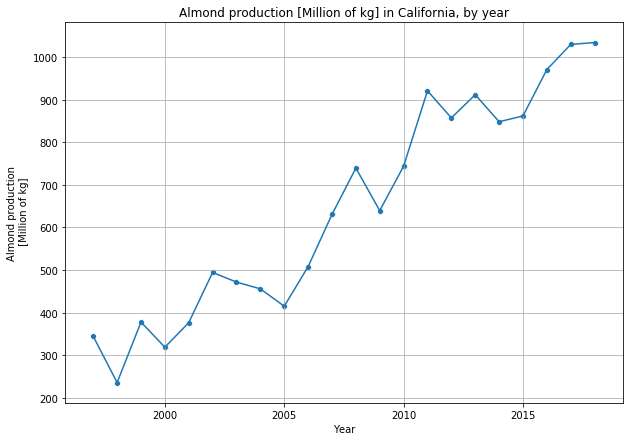

In [88]:
plt.figure(figsize=(10,7))
sns.lineplot(x='year', y='production', data=california_almond)
sns.scatterplot(x='year', y='production', data=california_almond)

plt.title('Almond production [Million of kg] in California, by year')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Almond production\n [Million of kg]')

Text(0, 0.5, 'Yield per acre [kg/acre]')

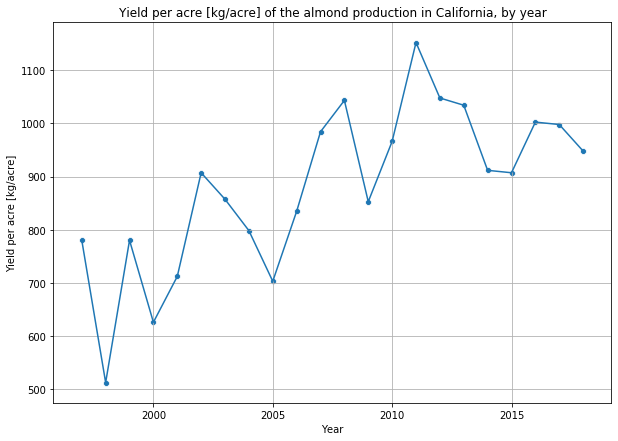

In [89]:
plt.figure(figsize=(10,7))
sns.lineplot(x='year', y='yield_per_acre', data=california_almond)
sns.scatterplot(x='year', y='yield_per_acre', data=california_almond)

plt.title('Yield per acre [kg/acre] of the almond production in California, by year')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Yield per acre [kg/acre]')

### Analysis

As we can see, the death of bees has not prevented the Californian almond industry to increase its production, as well as the amount of almonds produced per area.

This is due to the fact that bees are imported.

# Plan

## Week of 02.12.2019

- Find a way to tie all of our analysis and abstract together in a coherent story arc
- Lear how to use [Beautiful Jekyll](https://deanattali.com/beautiful-jekyll/) for our data story
- Learn how to use Plotly
- Prepare our *Github page*

## Week of 09.12.2019

- Implement convincing and insightful visualizations:
    - Interactive scatter plot between number of beehives and honey production for selected countries moving through the years
    - Heat map of the US with a toggle for the type of pest (Varroa, ...) and the desired quarter
    - ...
- Write a draft of our data story descriptions
    
## Week of 16.12.2019

- Complete our data story with inspiring descriptions of our data analysis
- Finalize Milestone 3

## Weeks until 20.01.2020

- Prepare the presentation
- Team practive for the presentation
- Print our poster

# Questions to TAs

- What should be the appropriate length for a data story? How much time should someone take to read it?

# New visualizations for Milestone 3

In [90]:
# TODO